In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [72]:
path = "../data/training/summary/sissis-er-20000.h5"
h5file = h5py.File(path, "r")

## LTP on star graphs

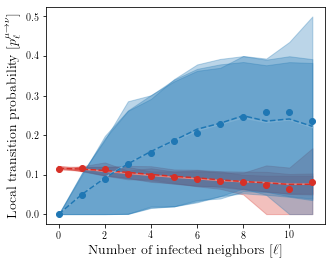

In [73]:
fontsize=14

color_true = [dl.utilities.color_pale["red"], dl.utilities.color_pale["blue"]]
color_gnn = [dl.utilities.color_dark["red"], dl.utilities.color_dark["blue"]]
handles = []

fig, ax = plt.subplots(1,1, figsize=(5, 4))
for i, t in enumerate(h5file["ltp-true"]):
    data = h5file["ltp-true"][t][...]
    x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
    ax.fill_between(x, el, eh, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='-', color=color_true[i], label="True")
    
    data = h5file["ltp-gnn"][t][...]
    x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
    ax.fill_between(x, el, eh, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    data = h5file["ltp-mle"][t][...]
    x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
    ax.fill_between(x, el, eh, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='None', marker='o', color=color_gnn[i], label="MLE")
    
#     x, y, err = experiment.metrics["UniformStarLTPMetrics"].aggregate(experiment.metrics["UniformStarLTPMetrics"].data["ltp"], 
#                                                                       in_state=t[0], out_state=t[1])
#     ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
#     ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    
plt.xlabel(r"Number of infected neighbors $[\ell]$", fontsize=fontsize)
plt.ylabel(r"Local transition probability $[p^{\mu\to\nu}_\ell]$", fontsize=fontsize)
plt.show()

## LTP on Star graph


NameError: name 'err' is not defined

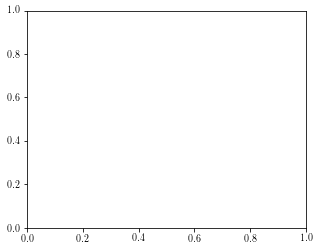

In [46]:
transitions = [(0, 1), (1, 0)]
transition_labels = [("S", "I"), ("I", "S")]
fontsize=14

color_true = [dl.utilities.color_pale["blue"], dl.utilities.color_pale["red"]]
color_gnn = [dl.utilities.color_dark["blue"], dl.utilities.color_dark["red"]]
handles = []

fig, ax = plt.subplots(1,1, figsize=(5, 4))
for i, t in enumerate(transitions):
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='-', color=color_true[i], label="True")
    
    x, y, err = experiment.metrics["GNNStarLTPMetrics"].aggregate(experiment.metrics["GNNStarLTPMetrics"].data["ltp"],
                                                                   in_state=t[0], out_state=t[1])
    ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
    ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
#     x, y, err = experiment.metrics["UniformStarLTPMetrics"].aggregate(experiment.metrics["UniformStarLTPMetrics"].data["ltp"], 
#                                                                       in_state=t[0], out_state=t[1])
#     ax.fill_between(x, y - err, y + err, color=color_gnn[i], alpha=0.3)
#     ax.plot(x, y, linestyle='--', color=color_gnn[i], label="GNN")
    
    
plt.xlabel(r"Number of infected neighbors $[\ell]$", fontsize=fontsize)
plt.ylabel(r"Local transition probability $[p^{\mu\to\nu}_\ell]$", fontsize=fontsize)
plt.show()

## JSD

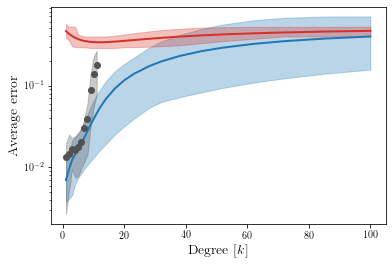

In [74]:
from scipy.spatial.distance import jensenshannon

data = h5file["jsd-true-gnn"][...]
x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
plt.fill_between(x, el, eh, color=dl.utilities.color_dark["blue"], alpha=0.3)
plt.plot(x, y, linestyle='-', color=dl.utilities.color_dark["blue"], linewidth=2)

data = h5file["jsd-true-uni"][...]
x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
plt.fill_between(x, el, eh, color=dl.utilities.color_dark["red"], alpha=0.3)
plt.plot(x, y, linestyle='-', color=dl.utilities.color_dark["red"], linewidth=2)

data = h5file["jsd-true-mle"][...]
x, y, el, eh = data[:,0], data[:,1], data[:,2], data[:,3]
plt.fill_between(x, el, eh, color=dl.utilities.color_dark["grey"], alpha=0.3)
plt.plot(x, y, linestyle='None', marker='o', color=dl.utilities.color_dark["grey"], linewidth=2)

plt.xlabel(r"Degree $[k]$", fontsize=fontsize)
plt.ylabel(r"Average error", fontsize=fontsize)

plt.xscale('linear')
plt.yscale('log')

plt.show()

## Phase transition


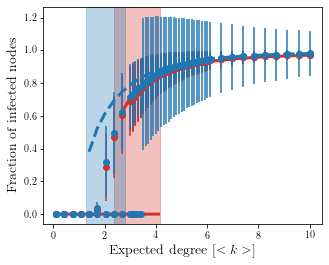

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

def plot_ss(ax, h5file):
    x = h5file["ss-parameters"]
    y = 1 - h5file["ss-true"]["avg"][0,:,0]
    err = h5file["ss-true"]["std"][0,:,0]
    ax.errorbar(x, y, yerr=err**2, linestyle='None', marker="o", color=dl.utilities.color_dark["red"])
    y = 1 - h5file["ss-true"]["avg"][1,:,0]
    err = h5file["ss-true"]["std"][1,:,0]
    ax.errorbar(x, y, yerr=err**2, linestyle='None', marker="o", color=dl.utilities.color_dark["red"])
    
    y = 1 - h5file["mf-gnn"]["avg"][0,:,0]
    err = h5file["mf-gnn"]["std"][0,:,0]
    ax.errorbar(x, y, yerr=err, linestyle='None', marker="o", color=dl.utilities.color_dark["blue"])
    y = 1 - h5file["mf-gnn"]["avg"][1,:,0]
    err = h5file["mf-gnn"]["std"][1,:,0]
    ax.errorbar(x, y, yerr=err**2, linestyle='None', marker="o", color=dl.utilities.color_dark["blue"])

def plot_mf1(ax, h5file):
    x = h5file["mf-parameters"]
    y = 1 - h5file["mf-true"]["fixed_points"][0,:,0]
    t = h5file["mf-true"]["thresholds"][0]
    ax.plot(x, y, linestyle='-', alpha=1, color=dl.utilities.color_dark["red"], marker='None', linewidth=3)
    ax.axvline(t, linestyle='-', alpha=0.5, color=dl.utilities.color_dark["red"], linewidth=1)
    
    y = 1 - h5file["mf-gnn"]["fixed_points"][0,:,0]
    t = h5file["mf-gnn"]["thresholds"][0]
    ax.plot(x, y, linestyle='--', alpha=1, color=dl.utilities.color_dark["blue"], marker='None', linewidth=3)
    ax.axvline(t, linestyle='-', alpha=0.5, color=dl.utilities.color_dark["blue"], linewidth=1)

def plot_mf2(ax, h5file):
    x = h5file["mf-parameters"]
    y1 = 1 - h5file["mf-true"]["fixed_points"][0,:,0]
    y2 = 1 - h5file["mf-true"]["fixed_points"][1,:,0]
    t1 = h5file["mf-true"]["thresholds"][0]
    t2 = h5file["mf-true"]["thresholds"][1]
    ax.plot(x[x < t1], y1[x < t1], linestyle='-', alpha=1, color=dl.utilities.color_dark["red"], marker='None', linewidth=3)
    ax.plot(x[x > t2], y2[x > t2], linestyle='-', alpha=1, color=dl.utilities.color_dark["red"], marker='None', linewidth=3)
    ax.axvspan(t1, t2, alpha=0.3, color=dl.utilities.color_dark["red"])
    
    y1 = 1 - h5file["mf-gnn"]["fixed_points"][0,:,0]
    y2 = 1 - h5file["mf-gnn"]["fixed_points"][1,:,0]
    t1 = h5file["mf-gnn"]["thresholds"][0]
    t2 = h5file["mf-gnn"]["thresholds"][1]
    ax.plot(x[x < t1], y1[x < t1], linestyle='--', alpha=1, color=dl.utilities.color_dark["blue"], marker='None', linewidth=3)
    ax.plot(x[x > t2], y2[x > t2], linestyle='--', alpha=1, color=dl.utilities.color_dark["blue"], marker='None', linewidth=3)
    ax.axvspan(t1, t2, alpha=0.3, color=dl.utilities.color_dark["blue"])


    

ax.set_xlabel('Expected degree [$<k>$]', fontsize=fontsize)
ax.set_ylabel('Fraction of infected nodes', fontsize=fontsize)
plot_mf2(ax, h5file)
plot_ss(ax, h5file)


In [66]:
h5file.keys()

<KeysViewHDF5 ['jsd-true-gnn', 'jsd-true-mle', 'jsd-true-uni', 'ltp-gnn', 'ltp-mle', 'ltp-true', 'mf-gnn', 'mf-parameters', 'mf-true', 'ss-parameters', 'ss-true']>

KeyError: 'PoissonEpidemicsMFMetrics'

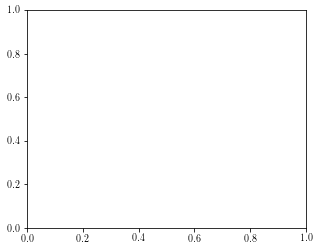

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))


mf_avgk = experiment.metrics["PoissonEpidemicsMFMetrics"].data["parameters"]

mf_low_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_low_fp"]
mf_high_s = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_high_fp"]
thresholds = experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_thresholds"]
ax.plot(mf_avgk[mf_avgk < thresholds[0]], 1 - mf_low_s[mf_avgk < thresholds[0], 0], linestyle='-', 
        color=dl.utilities.color_dark["blue"], marker='None', linewidth=2)
# ax.plot(mf_avgk[mf_avgk > thresholds[0]], 1 - mf_low_s[mf_avgk > thresholds[0], 0], linestyle='-', 
#         color=dl.utilities.color_dark["blue"], marker='None', linewidth=2)
# ax.plot(mf_avgk[mf_avgk < thresholds[1]], 1 - mf_high_s[mf_avgk < thresholds[1], 0], linestyle='-', 
#         color=dl.utilities.color_pale["blue"], marker='None', linewidth=2)
ax.plot(mf_avgk[mf_avgk > thresholds[1]], 1 - mf_high_s[mf_avgk > thresholds[1], 0], linestyle='-', 
        color=dl.utilities.color_pale["blue"], marker='None', linewidth=2, label=r"MF")
ax.axvline(thresholds[0], color=dl.utilities.color_dark["blue"], linestyle='dotted')
ax.axvline(thresholds[1], color=dl.utilities.color_pale["blue"], linestyle='dotted')

ss_avgk = experiment.metrics["PoissonEpidemicsSSMetrics"].data["parameters"]
avg_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_low_avg"]
std_low_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_low_std"]
avg_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_high_avg"]
std_high_s = experiment.metrics["PoissonEpidemicsSSMetrics"].data["true_high_std"]
ax.errorbar(ss_avgk, 1 - avg_low_s[:,0], yerr=std_low_s[:,0], 
            color=dl.utilities.color_dark["blue"], 
            marker='o', 
            linestyle='None',
           label="Sim. Abs.")
ax.errorbar(ss_avgk, 1 - avg_high_s[:,0], yerr=std_high_s[:,0], 
            color=dl.utilities.color_pale["blue"], 
            marker='v', 
            linestyle='None',
           label="Sim. Epi.")
ax.set_xlabel(r"Average degree $[\langle k \rangle]$", fontsize=fontsize)
ax.set_ylabel(r"Fraction of infected nodes", fontsize=fontsize)
ax.legend(fontsize=fontsize)

plt.show()


In [6]:
print(experiment.metrics["PoissonEpidemicsMFMetrics"].data["true_thresholds"])
print(experiment.metrics["PoissonEpidemicsMFMetrics"].data["gnn_thresholds"])

[4.50268555 2.81518555]
[]


In [ ]:
dl.metrics